In [1]:
!pip install kaggle

In [2]:
#configurating the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d girinathrs211555/aadhaar-datasets

aadhaar-datasets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extrcing the compossed Dataset
from zipfile import ZipFile
dataset = '/content/aadhaar-datasets.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
Aadhaar_card_files = os.listdir('/content/Aaadhaar AND Non aadhaar/Aadhaar')
print(Aadhaar_card_files[0:5])

print(Aadhaar_card_files[-5:])

['Aadhaar_card (3740).jpg', 'Aadhaar_card (1675).jpg', 'Aadhaar_card (371).jpg', 'Aadhaar_card (3661).jpg', 'Aadhaar_card (2918).jpg']
['Aadhaar_card (3423).jpg', 'Aadhaar_card (2137).jpg', 'Aadhaar_card (2529).jpg', 'Aadhaar_card (4624).jpg', 'Aadhaar_card (1486).jpg']


In [7]:
Non_aadhaar_card_files = os.listdir('/content/Aaadhaar AND Non aadhaar/Non Aadhaar')
print(Non_aadhaar_card_files[0:5])

print(Non_aadhaar_card_files[-5:])

['Non_Aadhaar  (207).jpg', 'Non_Aadhaar  (358).jpg', 'Non_Aadhaar  (789).jpg', 'Non_Aadhaar  (477).jfif', 'Non_Aadhaar  (1049).jfif']
['Non_Aadhaar  (876).jpg', 'Non_Aadhaar  (2917).jpg', 'Non_Aadhaar  (3041).jpg', 'Non_Aadhaar  (1658).jpg', 'Non_Aadhaar  (1563).jpg']


In [8]:
print('Number of with Aadhaar_card_files:', len(Aadhaar_card_files))
print('Number of without Non_aadhaar_card_files:', len(Non_aadhaar_card_files))

Number of with Aadhaar_card_files: 5009
Number of without Non_aadhaar_card_files: 5021


In [9]:
#create the labels

Aadhaar_card_labels = [1]*5009

Non_aadhaar_card_labels = [0]*5021

In [10]:
# Checking wheather the labels are created as expected
print(Aadhaar_card_labels[0:5])

print(Non_aadhaar_card_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
# I am Concanating  the  two class as labels

labels = Aadhaar_card_labels + Non_aadhaar_card_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

10030
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
# Convert images to numpy arrays

Aadhaar_card__path = '/content/Aaadhaar AND Non aadhaar/Aadhaar/'

data = []
for img_file in Aadhaar_card_files:

  image = Image.open(Aadhaar_card__path + img_file)
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)


Non_aadhaar_card_path = '/content/Aaadhaar AND Non aadhaar/Non Aadhaar/'

for img_file in Non_aadhaar_card_files:

  image = Image.open(Non_aadhaar_card_path + img_file)
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

In [13]:
# Coverting image list and the label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [14]:
type(X)

numpy.ndarray

In [15]:
type(Y)

numpy.ndarray

In [16]:
print(X.shape)
print(Y.shape)

(10030, 128, 128, 3)
(10030,)


In [17]:
print(Y)

[1 1 1 ... 0 0 0]


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [19]:
#Scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [20]:
import tensorflow as tf
from tensorflow import keras

In [21]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(300, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(600, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(800, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [22]:
# Compile the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [23]:
#traing the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=10)

Epoch 1/10
201/201 [==============================] - 76s 278ms/step - loss: 0.5692 - acc: 0.7224 - val_loss: 0.2717 - val_acc: 0.9196
Epoch 2/10
201/201 [==============================] - 47s 234ms/step - loss: 0.2300 - acc: 0.9209 - val_loss: 0.1163 - val_acc: 0.9763
Epoch 3/10
201/201 [==============================] - 49s 246ms/step - loss: 0.1324 - acc: 0.9581 - val_loss: 0.1184 - val_acc: 0.9826
Epoch 4/10
201/201 [==============================] - 48s 237ms/step - loss: 0.1031 - acc: 0.9670 - val_loss: 0.1686 - val_acc: 0.9875
Epoch 5/10
201/201 [==============================] - 48s 237ms/step - loss: 0.0781 - acc: 0.9780 - val_loss: 0.0817 - val_acc: 0.9819
Epoch 6/10
201/201 [==============================] - 49s 245ms/step - loss: 0.0693 - acc: 0.9776 - val_loss: 0.0604 - val_acc: 0.9863
Epoch 7/10
201/201 [==============================] - 48s 237ms/step - loss: 0.0498 - acc: 0.9824 - val_loss: 0.0673 - val_acc: 0.9907
Epoch 8/10
201/201 [==============================] - 4

In [24]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy=', accuracy)

63/63 [==============================] - 7s 110ms/step - loss: 0.1724 - acc: 0.9925
Test Accuracy= 0.9925224184989929


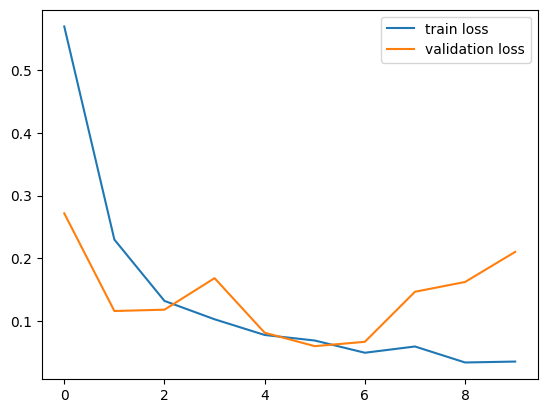

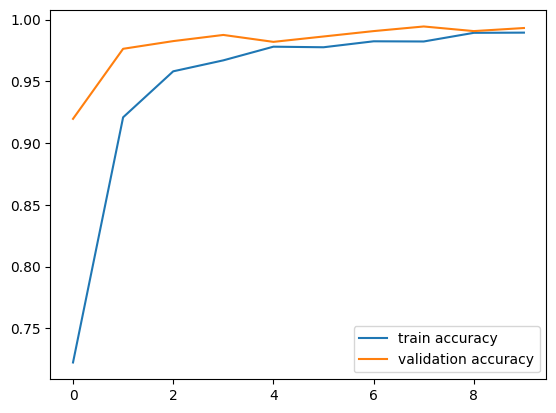

In [25]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128, 128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:

  print('This is an aadhaar card')

else:

  print('This not an aadhaar card')


In [35]:
# Save the trained model to a file
model.save('AC_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
